In [1]:
import os
import numpy as np
import pandas as pd

random_state = 42

# Create csv file with all paintings manually

In [16]:
print(os.getcwd())

/Users/hp/wikiart_classification


In [20]:
data_folder_name = '/Users/hp/wikiart/'

# Get a list of painting folders
style_folder_paths = [
    os.path.join(data_folder_name, style_name)
    for style_name in os.listdir(data_folder_name)
    if style_name != '.DS_Store'  # Exclude .DS_Store file
]

# Create a list of painting paths
painting_paths = [
    {
        'file_path': os.path.join(folder_path, painting_file),
        'style': folder_path.replace('/Users/hp/wikiart/', '').replace('_', ' ')
    }
    for folder_path in style_folder_paths
    for painting_file in os.listdir(folder_path)
    if painting_file != '.DS_Store'  # Exclude .DS_Store file
]

# Create DataFrame
df = pd.DataFrame(painting_paths)
df['style'] = df['style'].astype('category')
df['style_id'] = df['style'].cat.codes + 1
df


,file_path,style,style_id
0,/Users/hp/wikiart/Early_Renaissance/filippo-li...,Early Renaissance,9
1,/Users/hp/wikiart/Early_Renaissance/filippo-li...,Early Renaissance,9
2,/Users/hp/wikiart/Early_Renaissance/piero-dell...,Early Renaissance,9
3,/Users/hp/wikiart/Early_Renaissance/pietro-per...,Early Renaissance,9
4,/Users/hp/wikiart/Early_Renaissance/antonello-...,Early Renaissance,9
...,...,...,...
81441,/Users/hp/wikiart/Naive_Art_Primitivism/david-...,Naive Art Primitivism,16
81442,/Users/hp/wikiart/Naive_Art_Primitivism/marc-c...,Naive Art Primitivism,16
81443,/Users/hp/wikiart/Naive_Art_Primitivism/niko-p...,Naive Art Primitivism,16
81444,/Users/hp/wikiart/Naive_Art_Primitivism/niko-p...,Naive Art Primitivism,16


In [21]:
if not os.path.exists('data'):
    os.mkdir('data')
df.to_csv('data/full_data.csv', index=False)

# Data Exploration

In [22]:
df = pd.read_csv('data/full_data.csv')
df

,file_path,style,style_id
0,/Users/hp/wikiart/Early_Renaissance/filippo-li...,Early Renaissance,9
1,/Users/hp/wikiart/Early_Renaissance/filippo-li...,Early Renaissance,9
2,/Users/hp/wikiart/Early_Renaissance/piero-dell...,Early Renaissance,9
3,/Users/hp/wikiart/Early_Renaissance/pietro-per...,Early Renaissance,9
4,/Users/hp/wikiart/Early_Renaissance/antonello-...,Early Renaissance,9
...,...,...,...
81441,/Users/hp/wikiart/Naive_Art_Primitivism/david-...,Naive Art Primitivism,16
81442,/Users/hp/wikiart/Naive_Art_Primitivism/marc-c...,Naive Art Primitivism,16
81443,/Users/hp/wikiart/Naive_Art_Primitivism/niko-p...,Naive Art Primitivism,16
81444,/Users/hp/wikiart/Naive_Art_Primitivism/niko-p...,Naive Art Primitivism,16


In [25]:
#Genres
# Group by the 'style' column and count occurrences
genre_counts = df.groupby('style').size().reset_index(name='count')

# Sort the DataFrame by genre counts
genre_counts = genre_counts.sort_values('count', ascending=False)

print(genre_counts)

                         style  count
12               Impressionism  13060
21                     Realism  10733
23                 Romanticism   7019
9                Expressionism   6736
20          Post Impressionism   6451
24                   Symbolism   4528
3           Art Nouveau Modern   4334
4                      Baroque   4241
0       Abstract Expressionism   2782
17        Northern Renaissance   2552
15       Naive Art Primitivism   2405
7                       Cubism   2235
22                      Rococo   2089
5         Color Field Painting   1615
19                     Pop Art   1483
8            Early Renaissance   1391
11            High Renaissance   1343
14                  Minimalism   1337
13  Mannerism Late Renaissance   1279
26                     Ukiyo e   1167
10                     Fauvism    934
18                 Pointillism    513
6         Contemporary Realism    481
16                 New Realism    314
25            Synthetic Cubism    216
2           

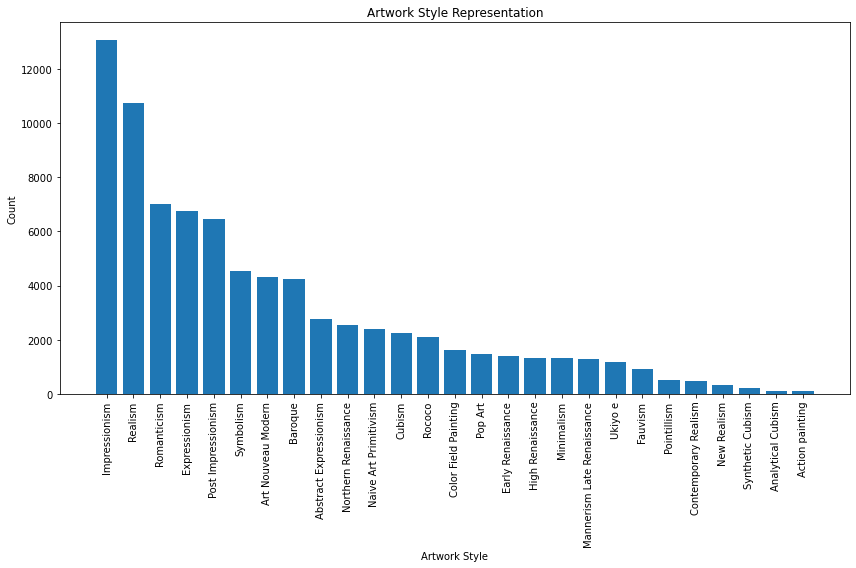

In [33]:
import matplotlib.pyplot as plt

# Extract style names and counts from the genre_counts DataFrame
styles = genre_counts['style']
counts = genre_counts['count']

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.bar(styles, counts)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Artwork Style')
plt.ylabel('Count')
plt.title('Artwork Style Representation')
plt.tight_layout()

# Display the bar graph
plt.show()

# Splitting Data

### Sample n from Each Style

In [34]:
n = 50

sample_df = df.groupby('style_id').sample(n, random_state=random_state)
sample_df.to_csv('data/sampled_data.csv', index=False)
sample_df

,file_path,style,style_id
77334,/Users/hp/wikiart/Abstract_Expressionism/bradl...,Abstract Expressionism,1
77694,/Users/hp/wikiart/Abstract_Expressionism/henri...,Abstract Expressionism,1
76986,/Users/hp/wikiart/Abstract_Expressionism/bui-x...,Abstract Expressionism,1
77010,/Users/hp/wikiart/Abstract_Expressionism/cy-tw...,Abstract Expressionism,1
77901,/Users/hp/wikiart/Abstract_Expressionism/conra...,Abstract Expressionism,1
...,...,...,...
16534,/Users/hp/wikiart/Ukiyo_e/katsushika-hokusai_s...,Ukiyo e,27
16503,/Users/hp/wikiart/Ukiyo_e/hiroshige_komokata-h...,Ukiyo e,27
16017,/Users/hp/wikiart/Ukiyo_e/hiroshige_kameyama.jpg,Ukiyo e,27
16228,/Users/hp/wikiart/Ukiyo_e/utagawa-kuniyoshi_wo...,Ukiyo e,27


# Split into train, val, test

In [35]:
train_size = int(len(sample_df.index)*0.6)
val_size = int(len(sample_df.index)*0.2)
test_size = int(len(sample_df.index)*0.2)

In [36]:
split_df = sample_df.sample(frac=1, random_state=random_state)

train = split_df.head(train_size)
split_df = split_df.tail(-train_size)

val = split_df.head(val_size)
split_df = split_df.tail(-val_size)

test = split_df.head(test_size)
split_df = split_df.tail(-test_size)

split_df

,file_path,style,style_id


In [37]:
train

,file_path,style,style_id
26514,/Users/hp/wikiart/Color_Field_Painting/mario-c...,Color Field Painting,6
72776,/Users/hp/wikiart/Post_Impressionism/vincent-v...,Post Impressionism,21
10184,/Users/hp/wikiart/Fauvism/august-macke_turkish...,Fauvism,11
9673,/Users/hp/wikiart/Contemporary_Realism/john-mi...,Contemporary Realism,7
33304,/Users/hp/wikiart/Realism/guntis-strupulis_a-k...,Realism,22
...,...,...,...
18503,/Users/hp/wikiart/High_Renaissance/luca-signor...,High Renaissance,12
78887,/Users/hp/wikiart/Synthetic_Cubism/juan-gris_t...,Synthetic Cubism,26
15370,/Users/hp/wikiart/Rococo/thomas-gainsborough_a...,Rococo,23
16664,/Users/hp/wikiart/Ukiyo_e/utagawa-kuniyoshi_sc...,Ukiyo e,27


In [38]:
train.to_csv('data/train.csv', index=False)
val.to_csv('data/val.csv', index=False)
test.to_csv('data/test.csv', index=False)